# **PREDICTION OF HEART DISEASES USING MACHINE LEARNING ALGORITHMS**

**Aim:**

To improve the accuracy of heart attach predicitions using machine learning and deep learining techniques, thereby supporting medical professionals in predicting heart disease more precisely.
Background: Each year, 17.5 million people die form heart disease, a number expected to raise to 75 million by 2030 according to WHO. Current medical predictions for heart attaks are abovut 67% accurate. To improve this, machine learning and deep learning offer potentials for more precise predications. This project compares analytical methods to assis researchers in enhancing prediction accuracy. Advances in Computer Science procided valuable tools for various fields, including medical science, where classification techniques can predict target categories or classes in data.

## Heart Disease Dataset Overview

1. **Age:**
Age of the individual in years
2. **Sex:**
Sex of the individual(1 = Male; 0 = Female).
3. **cp:** Chest Pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).
4. **trestbps:** Resting blood pressure in mm Hg (millimeters of mercury) on admission to the hospital
5. **chol:** Serum cholesterol in mg/dl (milligrams per deciliter).
6. **fbs:** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
7. **restecg:** Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
8. **thalach:** Maximum heart rate achieved.
9. **exang:** Exercise-induced anagina (1 = yes; 0 = no).
10. **oldpeak:** ST depression induced by exercise relative to rest.
11. **slop:** The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
12. **ca:** Number of major vessels (0 - 3) colored by fluoroscopy.
13. **thal:** Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
14. **target:** Diagnosis of heart disease (1 = presence of heart disease; 0 = absence of heart disease).

## Example Interpretation of Rows:

**First Row:**
 * A 52-year-old male with typical angina (cp = 0) has a resting blood pressure of 125 mm Hg, cholesterol level of 212 mg/dl, and normal fasting blood sugar (fbs = 0). His resting electrocardiographic result is having ST-T wave abnormality (restecg = 1). He achieved a maximum heart rate of 168 bpm with no exercise-induced angina (exang = 0), and an old peak value of 1. The slop of the peak exercise ST segment is 2 (downsloping), with 2 major vessels colored by fluoroscopy, and has a thalassemia value of 3. The target value is 0, indicating a no heart disease.


## Importing data and Preprocessing

Importing the necessary Python libraries to read the dataset and visualize the data.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Importing data set

data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Visulizing the features (Columns) from the dataset to identify `Independent` and `Dependent` variables

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Taking a look at shape of the data

In [4]:
data.shape

(1025, 14)

Checking for NaN values to replace them with the meaningful value

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Visualization

Data visualization is a crucial part of any data analysis project as it helps in understanding the underlying patterns and relationships in the data. For the heart disease dataset, we will use various visualization tehniques to explore the data and gain insights that can help in building a predictive model.

**Comparision plots**

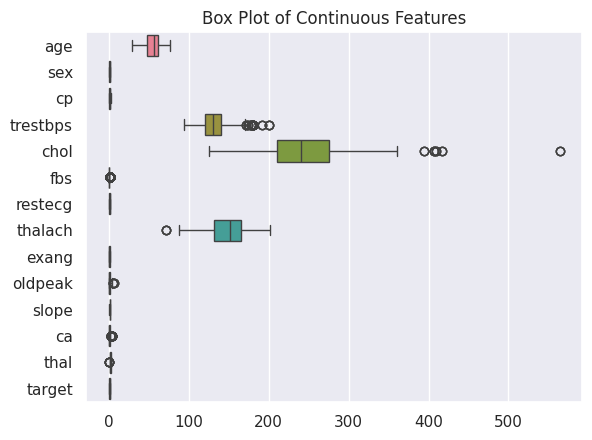

In [7]:
#Box-plot for clear visualization of distribution
sns.boxplot(data=data, orient="h")
plt.title("Box Plot of Continuous Features")
plt.show()

The box plot provided a clear visualization of the distribution of continuous features and their relationship with the `target` varialbe.

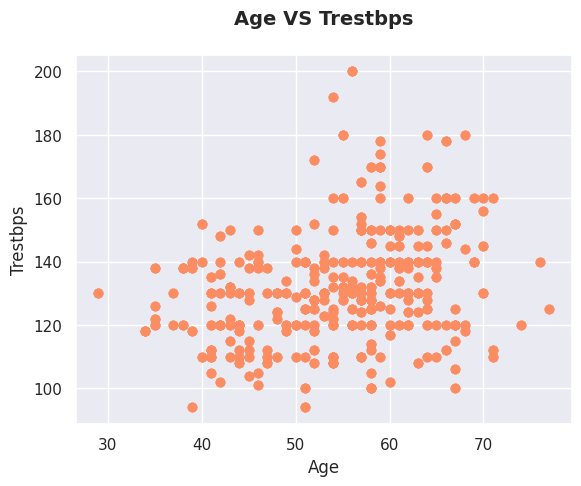

In [8]:
# Comparing Age vs Trestbps
plt.scatter(data.age, data.trestbps, color='#fc8d62')
plt.xlabel("Age")
plt.ylabel("Trestbps")
plt.title("Age VS Trestbps\n", size = 14, fontweight='bold')
plt.show()

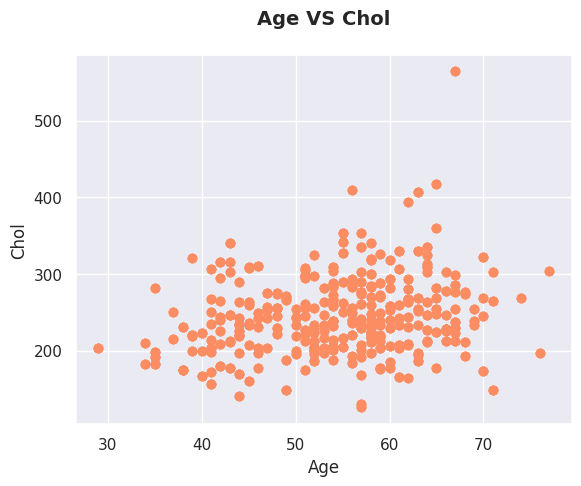

In [9]:
# Comparing Age vs Chol
plt.scatter(data.age, data.chol, color='#fc8d62')
plt.xlabel("Age")
plt.ylabel("Chol")
plt.title("Age VS Chol\n", size = 14, fontweight='bold')
plt.show()

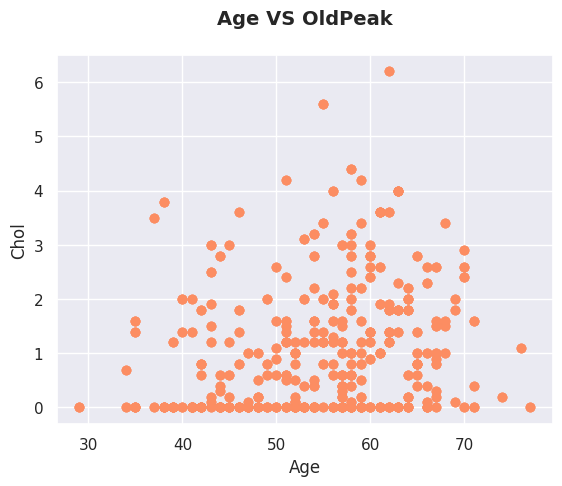

In [10]:
# Comparing Age vs oldpeak
plt.scatter(data.age, data.oldpeak, color='#fc8d62')
plt.xlabel("Age")
plt.ylabel("Chol")
plt.title("Age VS OldPeak\n", size = 14, fontweight='bold')
plt.show()

**Count Plots**

In [11]:
from matplotlib.colors import ListedColormap

# Define the two colors closely related to '#fc8d62' and '#66c2a5'
color1 = '#fc8d62'
color2 = '#66c2a5'

# Create a custom colormap blending the two colors
custom_cmap = ListedColormap([color1, color2])


<ipython-input-12-747d88ee8dda>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sex', palette=sns.color_palette('Set2'))
<ipython-input-12-747d88ee8dda>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data, x='sex', palette=sns.color_palette('Set2'))


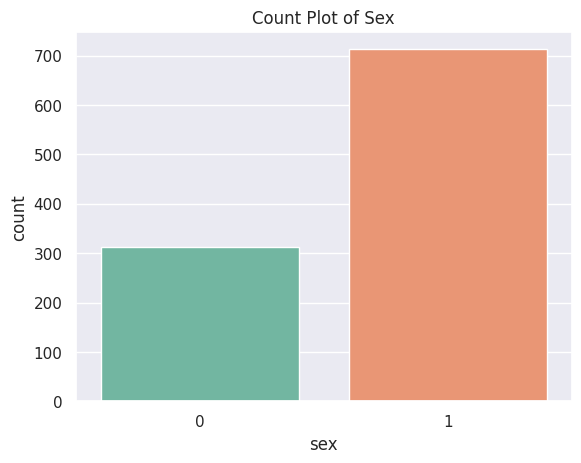

In [12]:
sns.countplot(data=data, x='sex', palette=sns.color_palette('Set2'))
plt.title("Count Plot of Sex")
plt.show()

<ipython-input-13-9a3281183187>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='cp', palette=sns.color_palette('Set2'))
<ipython-input-13-9a3281183187>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(data=data, x='cp', palette=sns.color_palette('Set2'))


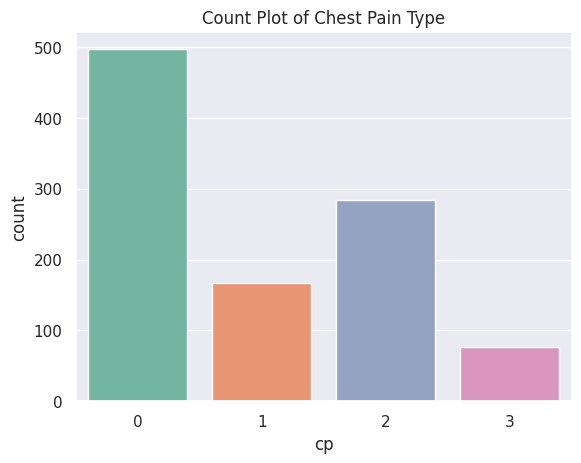

In [13]:
sns.countplot(data=data, x='cp', palette=sns.color_palette('Set2'))
plt.title("Count Plot of Chest Pain Type")
plt.show()

<ipython-input-14-f15ae2479992>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='fbs', palette=sns.color_palette('Set2'))
<ipython-input-14-f15ae2479992>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data, x='fbs', palette=sns.color_palette('Set2'))


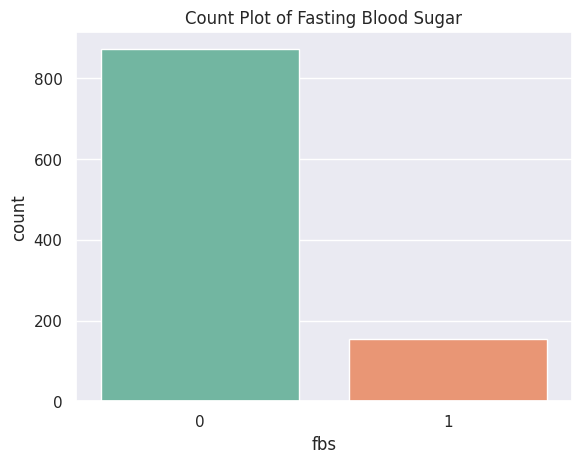

In [14]:
sns.countplot(data=data, x='fbs', palette=sns.color_palette('Set2'))
plt.title("Count Plot of Fasting Blood Sugar")
plt.show()

<ipython-input-15-4f04d0ccc0ac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='restecg',palette=sns.color_palette('Set2'))
<ipython-input-15-4f04d0ccc0ac>:1: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=data, x='restecg',palette=sns.color_palette('Set2'))


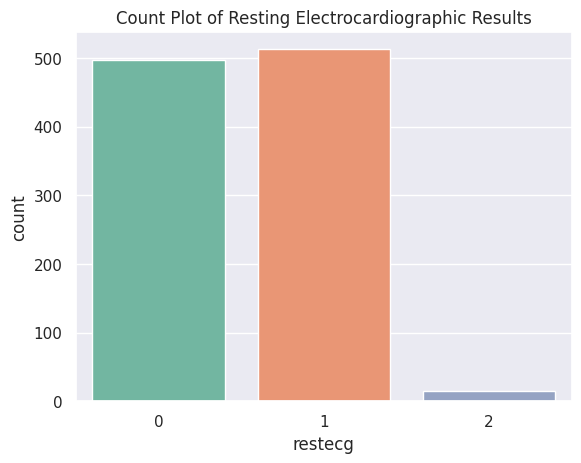

In [15]:
sns.countplot(data=data, x='restecg',palette=sns.color_palette('Set2'))
plt.title("Count Plot of Resting Electrocardiographic Results")
plt.show()

<ipython-input-16-a0c11f6659d0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='thal', palette=sns.color_palette('Set2'))
<ipython-input-16-a0c11f6659d0>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(data=data, x='thal', palette=sns.color_palette('Set2'))


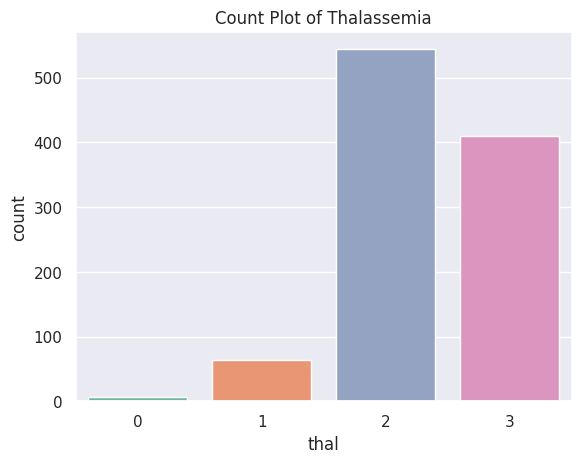

In [16]:
sns.countplot(data=data, x='thal', palette=sns.color_palette('Set2'))
plt.title("Count Plot of Thalassemia")
plt.show()

<ipython-input-17-f04c7c75c789>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=data, palette=sns.color_palette('Set2'))
<ipython-input-17-f04c7c75c789>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(x='target', data=data, palette=sns.color_palette('Set2'))


<Axes: xlabel='target', ylabel='count'>

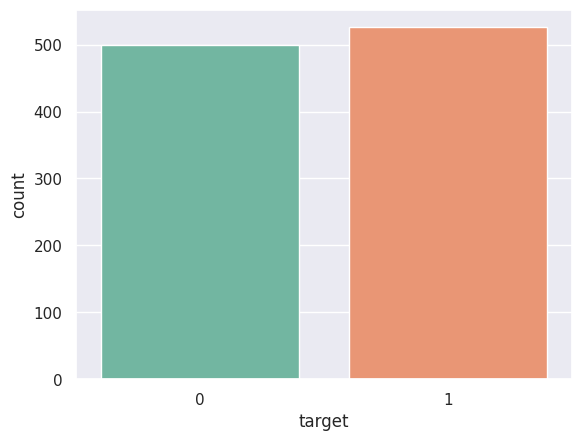

In [17]:
ax = sns.countplot(x='target', data=data, palette=sns.color_palette('Set2'))
ax

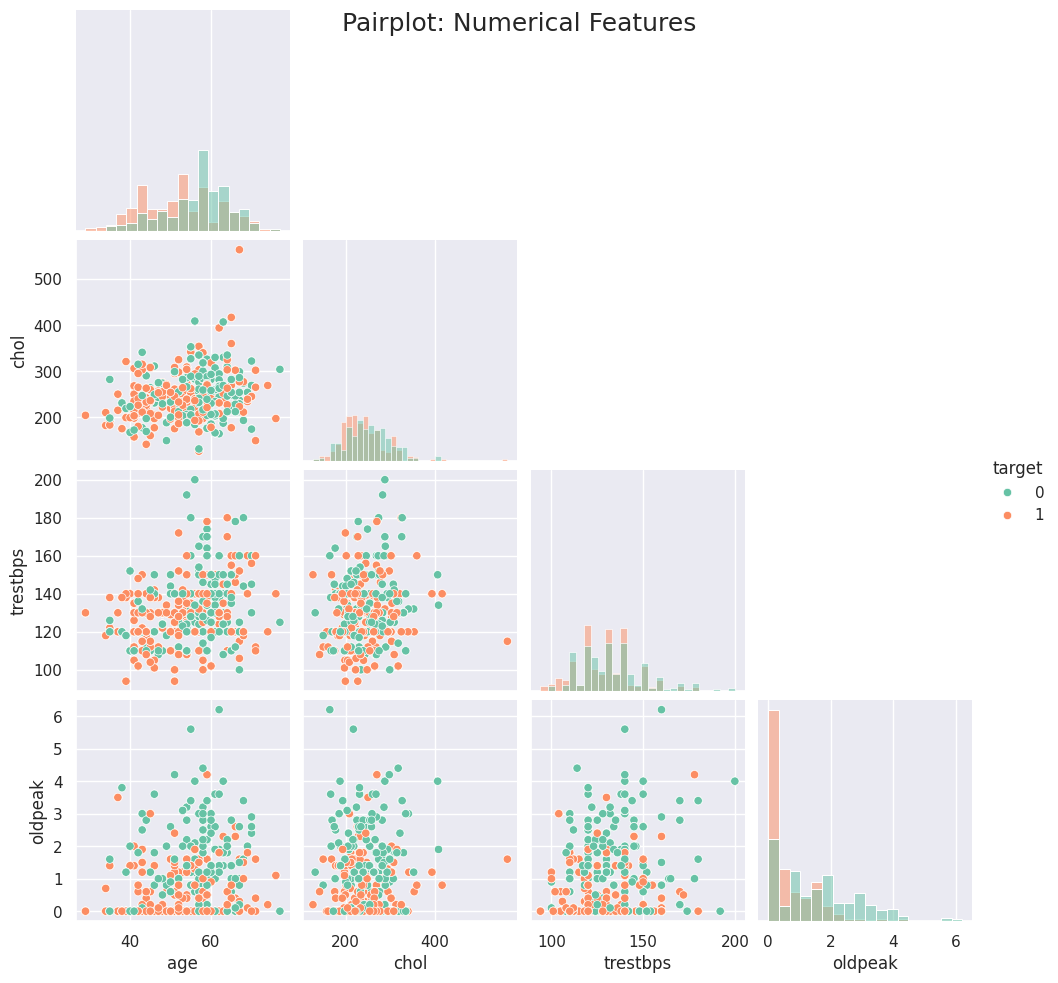

In [18]:
col = ['age', 'chol', 'trestbps', 'oldpeak', 'target']
data_ = data[col]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette='Set2');
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 18);

**Corelation Heatmap:**
A heatmap of the correlation matrix will help us understand the linear relationship between the features. Features with high correlation might be redundant and can be considered for removal to avoid multicollinearity.

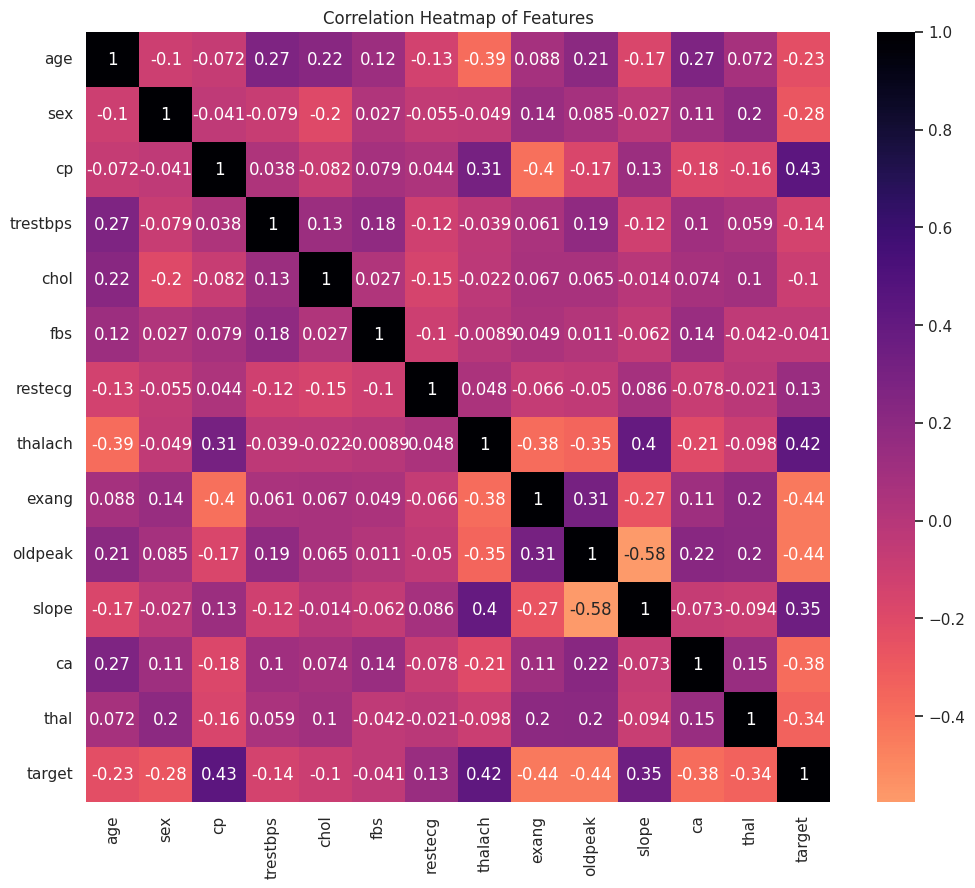

In [19]:
corr_matrix = data.corr()

# Ploting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='magma_r', center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

## Splitting the Data into Training set and Test set

Spliting the data into training and test sets to train the machine learning algorithms

In [20]:
# Seperating data into Independent Vector and Dependent Vector
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [22]:
print(X_train)

[[49.  1.  2. ...  2.  3.  2.]
 [64.  0.  0. ...  2.  0.  2.]
 [54.  0.  2. ...  2.  0.  2.]
 ...
 [51.  1.  0. ...  2.  0.  3.]
 [43.  1.  0. ...  2.  0.  3.]
 [52.  1.  0. ...  2.  1.  2.]]


## DecisionTreeClassifier

* A DecisionTreeClassifier is a machine learning model used for classificaion tasks. It works by recursively splitting the data into subset based on the feature that results in the most signigicant information gain or the highest reduction in impurity (e.g., Gini impurity or entropy). This process creates a tree-like structure where each internal node represents a decision based on a fearute, each branch represents the outcome of the decision, and each leaf node represents a class label. Decision tree are intuitive and easy to visulize, making them useful for understanding complex decision-making processes. However, they can be prone to overfitting, especially with noisy data, which can be mitigated by techiniques such as pruning or setting a maximum tree depth.

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# Make predictions on test set
y_pred = dtree.predict(X_test)

In [25]:
# Confusion matrix
decisionTree_conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", decisionTree_conf_mat)

Confusion Matrix:
 [[102   0]
 [  3 100]]


In [26]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0}%".format(accuracy*100))

Accuracy: 98.53658536585365%


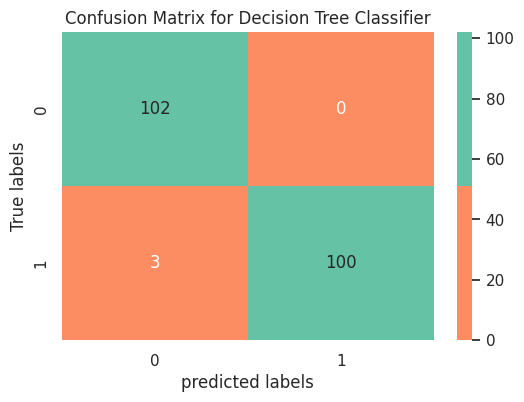

In [27]:
# Plotting Confusion matrix
plt.figure(figsize=(6, 4))

sns.heatmap(decisionTree_conf_mat, fmt='d', annot=True, cmap=custom_cmap)
plt.xlabel("predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [28]:
from sklearn.metrics import classification_report

decisionTree_class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", decisionTree_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



The DecisionTreeClassifier demonstrated exceptional performance, achieving an accuracy of 98.54%. This high level of accuracy indicats that the model effectively captured the underlying patterns and relationships in the data, making precise classification. The decision-making process.

## Naive Bayes

Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem, which describes the probability of an event based on prior knowledge of conditions related to the event. The algorithm is termed "naive" because it assumes that the features in the dataset are mutually independent, an assumption rarely true in real-world data. Despite this simplification, Naive Bayes classifiers often perform well in practice, especially for large datasets.

Naive Bayes calculates the posterior probability of each class given the input features and assigns the class with the highest posterior probability to the instance. It is computationally efficient, works well with high-dimensional data, and is particularly effective for text classification problems such as spam detection and sentiment analysis. However, it can struggle with feature independence and zero probability issues, which can be mitigated by techniques like Laplace smoothing.

In [29]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [30]:
pred_NB = NB.predict(X_test)

In [31]:
# Calculate and print confusion matrix

nb_conf_mat = confusion_matrix(y_test, pred_NB)
print(nb_conf_mat)

[[72 30]
 [11 92]]


In [32]:
accuracy = accuracy_score(y_test, pred_NB)
print("Accuracy: {0}".format(accuracy*100))

Accuracy: 80.0


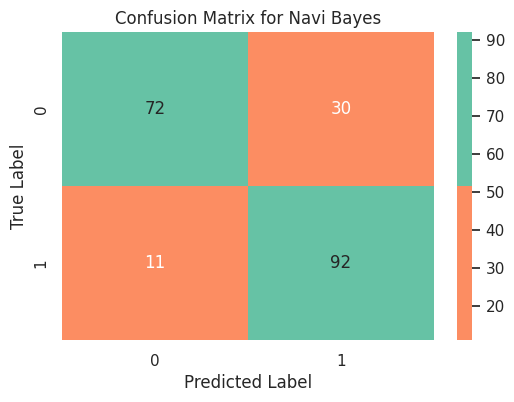

In [33]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(nb_conf_mat, annot=True, fmt='d', cmap=custom_cmap)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Navi Bayes')
plt.show()

In [34]:
from sklearn.metrics import classification_report

naviBayes_class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", naviBayes_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



The Naive Bayes classifier achieved an accuracy of 80%, indicating a reasonably good performance for the given classification task. This result demonstrates the algorithm's effectiveness in handling probabilistic classification despite its simplifying assumption of feature independence. Naive Bayes is particularly valued for its computational efficiency and robustness with high-dimensional data. However, the 80% accuracy suggests there is room for improvement, potentially by addressing the independence assumption or exploring additional features and data preprocessing techniques. Overall, Naive Bayes provides a solid baseline performance and is a useful tool for quick and efficient classification.

## RandomForestClassifier

The RandomForestClassifier is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It improves accuracy and controls overfitting by averaging the results of numerous trees, each built on a random subset of the data and features. This approach enhances robustness and generalization compared to a single decision tree.

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model training
RF = RandomForestClassifier(n_estimators=500)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [36]:
# Predictions on the test set
RF_pred = RF.predict(X_test)

In [37]:
# Computing accuracy
randomforest_conf_mat = confusion_matrix(y_test, RF_pred)
accuracy = accuracy_score(y_test, RF_pred)

In [38]:
print("Confusion Matrix:")
print(randomforest_conf_mat)

Confusion Matrix:
[[102   0]
 [  3 100]]


In [39]:
print("Accuracy: {0}".format(accuracy*100))

Accuracy: 98.53658536585365


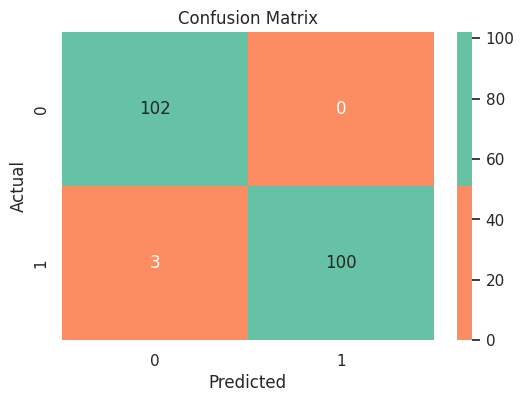

In [40]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(randomforest_conf_mat, annot=True, fmt='d', cmap=custom_cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



The RandomForestClassifier achieved the same high accuracy of 98.54% as the DecisionTreeClassifier, highlighting its effectiveness and robustness. This result demonstrates that RandomForest can match the performance of a single decision tree while typically offering better generalization and resistance to overfitting. The ensemble approach of averaging multiple trees contributes to its stability and reliability in making accurate predictions.

## Support Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates the data into different classes, maximizing the margin between the closest points of each class. SVM is effective in high-dimensional spaces and is known for its robustness and accuracy.

**Feature Scaling:**

Feature scaling is required to ensure that all features contribute equally to the model, especially for algorithms sensitive to feature magnitudes like SVM and K-nearest neighbors.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
from sklearn.svm import SVC
# Cross-validation configuration
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=3233)

# Defining the SVM model with a linear kernel
svm_linear = SVC()
# Defineing grid search parameters
param_grid = {'C': np.logspace(-3, 3, 10)}

#Performing grid search with cross-validation
grid_search = GridSearchCV(svm_linear, param_grid, cv=cv, n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=3233),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])})

In [44]:
best_svm_linear = grid_search.best_estimator_
print(best_svm_linear)

SVC(C=46.41588833612773)


In [45]:
y_pred = best_svm_linear.predict(X_test_scaled)

#Confusion matrix
svm_conf_mat = confusion_matrix(y_test, y_pred)
print(svm_conf_mat)

[[102   0]
 [  3 100]]


In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0}".format(accuracy*100))

Accuracy: 98.53658536585365


In [47]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



The SVM achieved an accuracy of 98.54%, matching the DecisionTreeClassifier and RandomForestClassifier

## Neural Networks

Neural networks are computational models inspired by the human brain, consisting of interconnected layers of neurons. They excel in capturing complex patterns in data through multiple hidden layers and non-linear transformations, making them powerful for tasks like image and speech recognition. Neural networks learn by adjusting weights through backpropagation to minimize the error between predicted and actual outputs.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [49]:
print(X_train)

[[57.  1.  0. ...  2.  0.  3.]
 [59.  1.  3. ...  2.  2.  2.]
 [62.  0.  0. ...  1.  0.  2.]
 ...
 [56.  1.  0. ...  1.  1.  2.]
 [62.  1.  0. ...  1.  2.  3.]
 [64.  1.  3. ...  1.  0.  3.]]


In [50]:
print(y_train)

[1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1
 0 1 0 0 0 0 1 0 1 0 0 1 

In [51]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, random_state=1)

In [52]:
y_pred = mlp.predict(X_test)

nn_conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(nn_conf_mat)
print(accuracy)

[[73 36]
 [20 76]]
0.7268292682926829


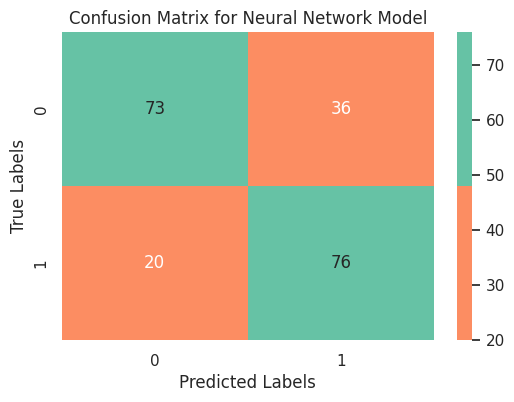

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(nn_conf_mat, annot=True, cmap=custom_cmap, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network Model')
plt.show()

In [54]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72       109
           1       0.68      0.79      0.73        96

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.74      0.73      0.73       205



The Neural Network achieved an accuracy of 72.68%. While lower than some other models, this result shows the algorithm's capability in handling complex patterns. With further tuning and possibly more data, its performance can potentially be improved.

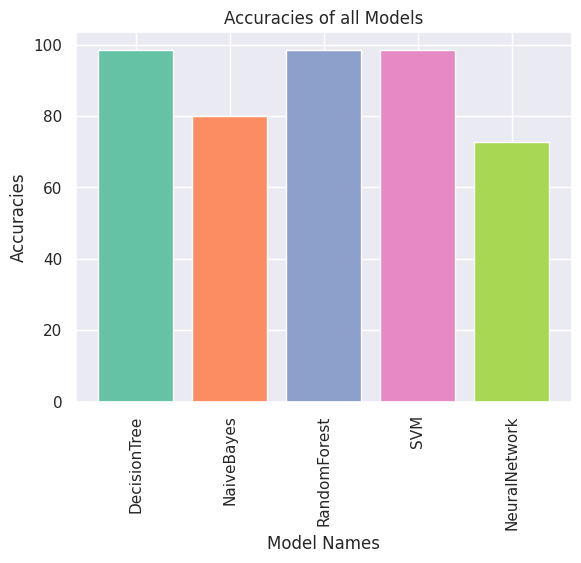

In [55]:
# Ploting all the accuracies

accuracies = [98.54, 80, 98.54, 98.54, 72.68]
modelNames = ["DecisionTree", "NaiveBayes", "RandomForest", "SVM", "NeuralNetwork"]

palette = sns.color_palette('Set2')

plt.bar(modelNames, accuracies, color=palette)
plt.xlabel("Model Names")
plt.ylabel("Accuracies")
plt.title("Accuracies of all Models")
plt.xticks(rotation=90)
plt.show()


## Conclusion:
In this study, I analyzed a dataset with 14 attributes and 1026 rows to predict coronary heart disease. I employed various techniques including decision trees, Naive Bayes, Random Forest, Support Vector Machine, Neural Networks, and different types of plots such as box plots and bar plots.

By applying these methods, we evaluated the accuracy of the predictions from the following models:

* **DecisionTreeClassifier  : 98.54%**
* **Naive Bayes             : 80%**
* **RandomForestClassifier  : 98.54%**
* **SVM                     : 98.54%**
* **Neural Network          : 72.68%**

I conducted statistical tests to derive potential predictions using the dataset, comparing the effecitveness of each method. While some technique outperformed others, it's evident that their performance varies.
